# WeatherPy
----

### Analysis
* Based on the data below, it appears that the closer one is to the equator, the hotter the temperature will likely be. It should be noted however that as the data was pulled in March, cities with a negative latitude will be as hot or hotter than cities at the equator due to it being Summer in the southern hemisphere and Winter in the norhtern.
* There does not appear to be a strong correlation between latitude and humidity however there appear to be very few cities in our sample with a humidity under 20%, perhaps suggesting a wetter climate as a whole right now. 
* There does not appear to be a strong correlation between latitude and wind speed however it appears that most of the data are below 40 mph, suggesting that perhaps the weather has been calmer as a whole.

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
print(cities)

['butaritari', 'komsomolskiy', 'konanur', 'forbes', 'bengkulu', 'provideniya', 'tiksi', 'saint-philippe', 'los llanos de aridane', 'rikitea', 'busselton', 'illoqqortoormiut', 'nanortalik', 'albany', 'antsohihy', 'jamestown', 'salalah', 'hobart', 'bjornevatn', 'pangnirtung', 'redlands', 'amderma', 'mataura', 'te anau', 'bredasdorp', 'wajid', 'hilo', 'mezen', 'remanso', 'georgetown', 'khonuu', 'minna', 'kapaa', 'peniche', 'luena', 'mae sot', 'ribeira grande', 'manokwari', 'lagos', 'havoysund', 'jiuquan', 'lubango', 'husavik', 'cape town', 'dikson', 'lazaro cardenas', 'synya', 'east london', 'thompson', 'ancud', 'qaanaaq', 'okhotsk', 'torbay', 'grindavik', 'vaini', 'carballo', 'saint-augustin', 'beloha', 'ginda', 'kuche', 'kaitangata', 'hirara', 'victoria', 'saskylakh', 'galle', 'port alfred', 'pisco', 'xushan', 'belushya guba', 'narsaq', 'jiayuguan', 'tuktoyaktuk', 'putina', 'upernavik', 'mehamn', 'ogori', 'punta arenas', 'olinda', 'khatanga', 'yellowknife', 'lompoc', 'taolanaro', 'zabol

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
city_name = []
temp = []
clouds = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []


counter = 1
set = 1
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
# # Loop through the list of cities and perform a request for data on each
for city in cities:
        try:
            response = requests.get(query_url + city).json()
            print(f'Processing Record {counter} of Set {set} | {city}')
            counter += 1
            if counter > 50:
                set += 1
                counter = 1
            city_name.append(response['name'])
            temp.append(response['main']['temp'])
            clouds.append(response['clouds']['all'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
        except KeyError:
            print(f'City not found. Skipping...')
            pass
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | komsomolskiy
Processing Record 3 of Set 1 | konanur
Processing Record 4 of Set 1 | forbes
Processing Record 5 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | antsohihy
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | bjornevatn
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | redlands
Pro

Processing Record 39 of Set 4 | tianpeng
Processing Record 40 of Set 4 | honningsvag
Processing Record 41 of Set 4 | avarua
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | fillan
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | kindersley
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | hrodna
Processing Record 50 of Set 4 | lumberton
Processing Record 1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 | nampula
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | puerto cabezas
Processing Record 6 of Set 5 | lolua
City not found. Skipping...
Processing Record 7 of Set 5 | manuk mangkaw
Processing Record 8 of Set 5 | santa cruz do rio pardo
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | pochutla
Processing Record 11 of S

Processing Record 30 of Set 8 | prince rupert
Processing Record 31 of Set 8 | rungata
City not found. Skipping...
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | wageningen
Processing Record 35 of Set 8 | ucluelet
Processing Record 36 of Set 8 | sabla
Processing Record 37 of Set 8 | orgun
City not found. Skipping...
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | markova
Processing Record 40 of Set 8 | umtata
Processing Record 41 of Set 8 | batsfjord
Processing Record 42 of Set 8 | gimli
Processing Record 43 of Set 8 | le port
Processing Record 44 of Set 8 | kargasok
Processing Record 45 of Set 8 | bakel
Processing Record 46 of Set 8 | suba
Processing Record 47 of Set 8 | naron
Processing Record 48 of Set 8 | omboue
Processing Record 49 of Set 8 | qaqortoq
Processing Record 50 of Set 8 | manbij
Processing Record 1 of Set 9 | cayenne
Processing Record 2 of Set 9 | rondonopolis
Processing 

Processing Record 12 of Set 12 | grojec
Processing Record 13 of Set 12 | berdigestyakh
Processing Record 14 of Set 12 | asino
Processing Record 15 of Set 12 | general roca
Processing Record 16 of Set 12 | rio gallegos
Processing Record 17 of Set 12 | gao
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | pangody
Processing Record 20 of Set 12 | mujiayingzi
Processing Record 21 of Set 12 | polovinnoye
Processing Record 22 of Set 12 | gravdal
Processing Record 23 of Set 12 | binga
Processing Record 24 of Set 12 | bayir
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | jawhar
Processing Record 27 of Set 12 | bad mergentheim
Processing Record 28 of Set 12 | petrolina
Processing Record 29 of Set 12 | sarkikaraagac
Processing Record 30 of Set 12 | las vegas
Processing Record 31 of Set 12 | ayagoz
Processing Record 32 of Set 12 | kupang
Processing Record 33 of Set 12 | sao joao da barra
Processing Record 34 of Set 12 | mount isa
Processing Record 

In [29]:
climate_dict = {'Name': city_name,'Temp': temp,'Clouds': clouds, 'Date': date,'Humidity': humidity,'Lat': lat_list,
               'Lng': lng_list, 'Max Temp': max_temp, 'Wind Speed': wind_speed}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
climate_df = pd.DataFrame(climate_dict)
climate_df.to_csv("climate_data.csv", encoding="utf-8", index=False)
climate_df.count()
climate_df.head()

,Name,Temp,Clouds,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,79.33,92,1551653062,100,3.07,172.79,79.33,10.45
1,Komsomolskiy,-13.02,20,1551653063,39,67.55,63.78,-13.02,5.64
2,Konanur,66.05,0,1551653064,86,12.63,76.05,66.05,2.95
3,Forbes,84.00,0,1551652826,41,-33.38,148.01,84.00,5.01
4,Provideniya,30.20,90,1551650400,92,64.42,-173.23,30.20,33.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

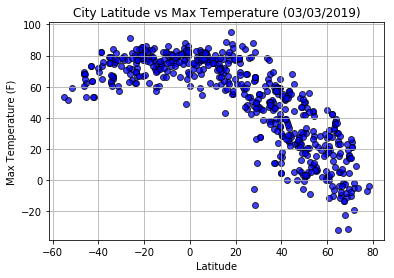

In [38]:
plt.scatter(climate_df['Lat'], climate_df['Max Temp'],alpha=0.75,facecolors='blue',edgecolors = 'black')
plt.grid()
plt.title("City Latitude vs Max Temperature (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatVsMaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

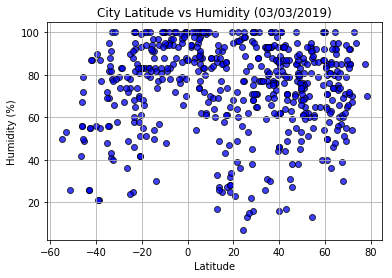

In [39]:
plt.scatter(climate_df['Lat'], climate_df['Humidity'],alpha=0.75,facecolors='blue',edgecolors = 'black')
plt.grid()
plt.title("City Latitude vs Humidity (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

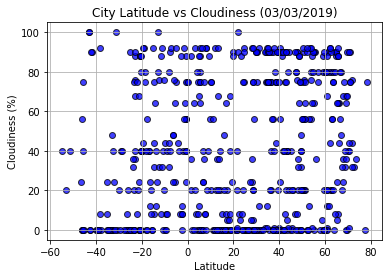

In [41]:
plt.scatter(climate_df['Lat'], climate_df['Clouds'],alpha=0.75,facecolors='blue',edgecolors = 'black')
plt.grid()
plt.title("City Latitude vs Cloudiness (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

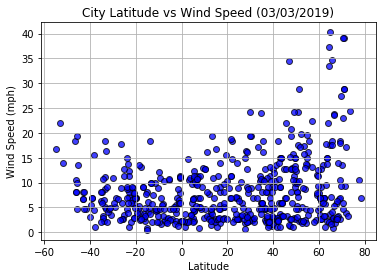

In [42]:
plt.scatter(climate_df['Lat'], climate_df['Wind Speed'],alpha=0.75,facecolors='blue',edgecolors = 'black')
plt.grid()
plt.title("City Latitude vs Wind Speed (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatVsWind.png")
plt.show()